<a href="https://colab.research.google.com/github/fx-manmeet/learn-ml-repo/blob/main/Anomaly_detection_in_cellular_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####The purpose of this notebook is to solve a classification problem proposed as a competition in the Kaggle InClass platform. we used different exploratory data analysis, feature selection and classification techniques. Lets walk through it.

###Required libreries:

####**pandas**: to work with dataset

####**decisionTreeClassifier** model, **GaussianNB** model, **train_test_split**, **confusion_matrix** from scikit-learn for their self explainatory tasks

In [38]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

Exploratory Data Analysis

In [2]:
df = pd.read_csv('/content/drive/MyDrive/cellular_anamoly_dataset/ML-MATT-CompetitionQT1920_train.csv', encoding='windows-1252')

In [3]:
df.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36904 non-null  object 
 1   CellName     36904 non-null  object 
 2   PRBUsageUL   36904 non-null  float64
 3   PRBUsageDL   36904 non-null  float64
 4   meanThr_DL   36904 non-null  float64
 5   meanThr_UL   36904 non-null  float64
 6   maxThr_DL    36904 non-null  float64
 7   maxThr_UL    36904 non-null  float64
 8   meanUE_DL    36904 non-null  float64
 9   meanUE_UL    36904 non-null  float64
 10  maxUE_DL     36815 non-null  float64
 11  maxUE_UL     36815 non-null  float64
 12  maxUE_UL+DL  36899 non-null  object 
 13  Unusual      36904 non-null  int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 3.9+ MB


In [5]:
df.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
count,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36815.000000,36815.000000,36904.000000
mean,7.835090,2.106396,0.560525,0.067610,17.764369,1.791974,1.173441,0.665143,4.190819,3.063371,0.275932
std,8.428206,2.247514,0.727623,0.186555,15.739932,5.028928,0.214065,0.535493,1.772484,1.387446,0.446989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213000,0.707000,0.140000,0.021000,5.710750,0.362000,1.041000,0.010000,3.000000,2.000000,0.000000
50%,4.547000,1.314000,0.352000,0.040000,14.170000,0.703000,1.112000,1.011000,4.000000,3.000000,0.000000
75%,12.126000,2.728000,0.718000,0.075000,25.059500,1.242000,1.263000,1.051000,5.000000,4.000000,1.000000
max,51.333000,77.505000,19.601000,12.461000,140.008000,48.253000,2.915000,2.668000,12.000000,12.000000,1.000000


In [6]:
df.isnull().sum()

Time            0
CellName        0
PRBUsageUL      0
PRBUsageDL      0
meanThr_DL      0
meanThr_UL      0
maxThr_DL       0
maxThr_UL       0
meanUE_DL       0
meanUE_UL       0
maxUE_DL       89
maxUE_UL       89
maxUE_UL+DL     5
Unusual         0
dtype: int64

####As shown *maxUE_DL*, *max_UE_UL* and *max_UE_UL+DL* have null values. Lets examime what kind of null values it have.

In [7]:
null_UL = pd.isnull(df["maxUE_UL"])
df[null_UL]

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
51,16:15,6ALTE,13.743,4.042,2.113,0.100,44.483,1.110,0.0,0.0,NaN,NaN,#¡VALOR!,0
1290,14:30,3BLTE,22.837,2.324,0.500,0.090,24.374,0.847,0.0,0.0,NaN,NaN,#¡VALOR!,0
2082,6:15,7ULTE,0.199,1.791,0.693,0.032,15.634,0.353,0.0,0.0,NaN,NaN,#¡VALOR!,1
2842,16:15,5ALTE,9.903,1.516,0.466,0.032,24.576,0.931,0.0,0.0,NaN,NaN,#¡VALOR!,0
3384,16:15,7CLTE,0.404,0.909,0.216,0.042,9.730,2.714,0.0,0.0,NaN,NaN,#¡VALOR!,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36036,6:00,9BLTE,1.516,0.505,0.078,0.013,1.298,0.267,0.0,0.0,NaN,NaN,#¡VALOR!,0
36046,13:00,3CLTE,15.360,2.829,1.149,0.071,39.615,0.947,0.0,0.0,NaN,NaN,#¡VALOR!,0
36317,13:00,1ALTE,30.921,4.042,1.450,0.175,26.369,1.487,0.0,0.0,NaN,NaN,#¡VALOR!,0
36652,8:00,7VLTE,0.606,1.819,0.255,0.027,14.546,0.820,0.0,0.0,NaN,NaN,#¡VALOR!,0


In [8]:
df['maxUE_UL+DL'].unique()

array(['7', '10', '2', '4', '3', '11', '6', '8', '5', '9', '12',
       '#¡VALOR!', '14', '17', '0', '13', '15', '16', '18', '19', '1',
       '20', '23', nan, '21'], dtype=object)

####This shows *maxUE_UL+DL* has wiered `#¡VALOR!` value.

####The mean value for user equipment (UE) data are available, so it is fine to not consider these columns.

#Feature selection

In [9]:
 # import file in new dataframe to start clean
data = pd.read_csv('/content/drive/MyDrive/cellular_anamoly_dataset/ML-MATT-CompetitionQT1920_train.csv', encoding='windows-1252')

###`Time` column is in date-time format. Instead to use it as feature the hour of the day is fine for this purpose. Doing this the values of `Time` column has become numeric now that helps out cause.

In [10]:
data['Hour'] = pd.to_datetime(data['Time']).dt.hour

<ipython-input-10-d860d8b858cd>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Time']).dt.hour


In [11]:
data['Hour']

0        10
1         9
2         7
3         2
4         3
         ..
36899    21
36900     9
36901    13
36902    12
36903    15
Name: Hour, Length: 36904, dtype: int32

###Column `CellName` has character data and also it contains useful information of the station of data collection.So it can't simply be droped. Solution is to convert `CellName` into one-hot encoding. It makes it numeric helping our cause.




In [12]:
data = pd.get_dummies(data, columns=['CellName'], drop_first=True, dtype=int)

In [13]:
data

,Time,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,...,CellName_7BLTE,CellName_7CLTE,CellName_7ULTE,CellName_7VLTE,CellName_7WLTE,CellName_8ALTE,CellName_8BLTE,CellName_8CLTE,CellName_9ALTE,CellName_9BLTE
0,10:45,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,...,0,0,0,0,0,0,0,0,0,0
1,9:45,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,...,0,0,0,0,0,0,0,0,0,0
2,7:45,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,...,0,0,0,0,0,0,0,0,0,1
3,2:45,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,...,0,0,0,0,0,0,0,0,0,0
4,3:30,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36899,21:30,7.579,0.808,0.164,0.037,7.980,0.375,1.101,0.010,4.0,...,0,0,0,0,0,0,0,0,0,0
36900,9:45,9.095,1.213,0.189,0.030,19.510,1.583,1.122,1.031,4.0,...,0,0,0,0,0,0,0,1,0,0
36901,13:30,4.378,0.896,0.341,0.030,12.037,0.540,1.065,1.005,4.0,...,0,0,0,0,0,0,0,0,0,1
36902,12:30,13.339,2.728,0.559,0.065,28.187,0.894,1.223,1.061,5.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.columns

Index(['Time', 'PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL',
       'maxThr_DL', 'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'maxUE_DL',
       'maxUE_UL', 'maxUE_UL+DL', 'Unusual', 'Hour', 'CellName_10BLTE',
       'CellName_10CLTE', 'CellName_1ALTE', 'CellName_1BLTE', 'CellName_1CLTE',
       'CellName_2ALTE', 'CellName_3ALTE', 'CellName_3BLTE', 'CellName_3CLTE',
       'CellName_4ALTE', 'CellName_4BLTE', 'CellName_4CLTE', 'CellName_5ALTE',
       'CellName_5BLTE', 'CellName_5CLTE', 'CellName_6ALTE', 'CellName_6BLTE',
       'CellName_6CLTE', 'CellName_6ULTE', 'CellName_6VLTE', 'CellName_6WLTE',
       'CellName_7ALTE', 'CellName_7BLTE', 'CellName_7CLTE', 'CellName_7ULTE',
       'CellName_7VLTE', 'CellName_7WLTE', 'CellName_8ALTE', 'CellName_8BLTE',
       'CellName_8CLTE', 'CellName_9ALTE', 'CellName_9BLTE'],
      dtype='object')

In [15]:
data.drop(columns=['Time'], inplace=True)   #no need of time column as it becomes redudant now

In [16]:
# feature selection
data.isnull().sum()

PRBUsageUL          0
PRBUsageDL          0
meanThr_DL          0
meanThr_UL          0
maxThr_DL           0
maxThr_UL           0
meanUE_DL           0
meanUE_UL           0
maxUE_DL           89
maxUE_UL           89
maxUE_UL+DL         5
Unusual             0
Hour                0
CellName_10BLTE     0
CellName_10CLTE     0
CellName_1ALTE      0
CellName_1BLTE      0
CellName_1CLTE      0
CellName_2ALTE      0
CellName_3ALTE      0
CellName_3BLTE      0
CellName_3CLTE      0
CellName_4ALTE      0
CellName_4BLTE      0
CellName_4CLTE      0
CellName_5ALTE      0
CellName_5BLTE      0
CellName_5CLTE      0
CellName_6ALTE      0
CellName_6BLTE      0
CellName_6CLTE      0
CellName_6ULTE      0
CellName_6VLTE      0
CellName_6WLTE      0
CellName_7ALTE      0
CellName_7BLTE      0
CellName_7CLTE      0
CellName_7ULTE      0
CellName_7VLTE      0
CellName_7WLTE      0
CellName_8ALTE      0
CellName_8BLTE      0
CellName_8CLTE      0
CellName_9ALTE      0
CellName_9BLTE      0
dtype: int

In [17]:
#dropping it as they are slight redudant with emaculate mean values
data.drop(columns=['maxUE_UL','maxUE_DL','maxUE_UL+DL'], inplace=True)

In [18]:
# selecting features and lables from dataframe
X = data.drop(columns=['Unusual'])
Y = data['Unusual']

In [19]:
X.columns

Index(['PRBUsageUL', 'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL',
       'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'Hour', 'CellName_10BLTE',
       'CellName_10CLTE', 'CellName_1ALTE', 'CellName_1BLTE', 'CellName_1CLTE',
       'CellName_2ALTE', 'CellName_3ALTE', 'CellName_3BLTE', 'CellName_3CLTE',
       'CellName_4ALTE', 'CellName_4BLTE', 'CellName_4CLTE', 'CellName_5ALTE',
       'CellName_5BLTE', 'CellName_5CLTE', 'CellName_6ALTE', 'CellName_6BLTE',
       'CellName_6CLTE', 'CellName_6ULTE', 'CellName_6VLTE', 'CellName_6WLTE',
       'CellName_7ALTE', 'CellName_7BLTE', 'CellName_7CLTE', 'CellName_7ULTE',
       'CellName_7VLTE', 'CellName_7WLTE', 'CellName_8ALTE', 'CellName_8BLTE',
       'CellName_8CLTE', 'CellName_9ALTE', 'CellName_9BLTE'],
      dtype='object')

In [20]:
Y


0        1
1        1
2        1
3        1
4        0
        ..
36899    0
36900    0
36901    1
36902    0
36903    0
Name: Unusual, Length: 36904, dtype: int64

In [21]:
#split for training and valifation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Classification

##Gaussian Naive Bayes (GaussianNB)

Gaussian Naive Bayes assumes that the continuous features follow a normal distribution. This variant is specifically used when the features are continuous and can be modeled using a Gaussian distribution.

Which is not he case here but lets try and see result.

In [22]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = gnb.predict(X_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5477577564015716


As expected this didn't go well, `Accuracy: 0.5477577564015716` in Binary classification means model learned nothing.

Lets now go with decision tree classifier it is better suited as It is a non-parametric supervised learning algorithm used for classification. It splits the data into subsets based on the value of input features, making decisions at each node until a prediction is made at a leaf node.

In [25]:
classifier = DecisionTreeClassifier()

In [26]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
training_accuracy = classifier.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy}")

Training Accuracy: 1.0


In [44]:
import matplotlib.pyplot as plt

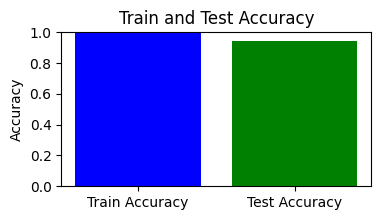

In [47]:
testing_accuracy = classifier.score(X_test, y_test)

# Plot the accuracies
plt.figure(figsize=(4, 2))
plt.bar(['Train Accuracy', 'Test Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.show()

In [27]:
y_pred_dt = classifier.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)
print("F1 score:", f1_score(y_test, y_pred_dt))

Accuracy: 0.9460777672402113
Confusion Matrix:
[[5157  178]
 [ 220 1826]]
F1 score: 0.9017283950617284


Above parameters have very decent numbers.

## So we accomplished our task wit 94.5% accuracy.

In [29]:
#predicting for real test split provided by Kaggle
test_df = pd.read_csv('/content/drive/MyDrive/cellular_anamoly_dataset/ML-MATT-CompetitionQT1920_test.csv', encoding='windows-1252')

In [30]:
test_df['Hour'] = pd.to_datetime(test_df['Time']).dt.hour

<ipython-input-30-d3679b940fcb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Hour'] = pd.to_datetime(test_df['Time']).dt.hour


In [31]:
test_df = pd.get_dummies(test_df, columns=['CellName'], drop_first=True, dtype=int)

In [32]:
test_df.drop(columns=['Time'], inplace=True)
test_df.drop(columns=['maxUE_UL','maxUE_DL','maxUE_UL+DL'], inplace=True)

In [33]:
y_pred_test = classifier.predict(test_df)

In [34]:
y_pred_test

array([1, 0, 0, ..., 0, 0, 0])

In [35]:
df = pd.DataFrame(y_pred_test, columns=['anamoly'])

In [36]:
#to store in the form kaggle requires
df.to_csv('classification.csv', index=True)

###Saving the model

In [54]:
#sove model for inference
pickle_file = 'anamoly_dector_tree.pickle'
with open(pickle_file, 'wb') as file:
    pickle.dump(classifier, file)

In [55]:
with open(pickle_file, 'rb') as file:
    loaded_classifier = pickle.load(file)

In [56]:
y_load_test = loaded_classifier.predict(test_df)

###Trying out random forest classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
# trying out random forest
forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

Training accuracy : 100.0
Testing accuracy : 91.00392900690963


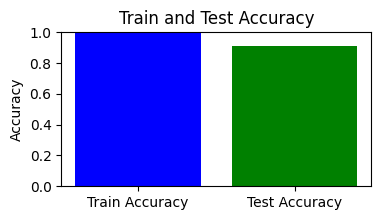

In [59]:
training_accuracy = forest_classifier.score(X_train, y_train)
testing_accuracy = forest_classifier.score(X_test, y_test)
print("Training accuracy :",training_accuracy*100)
print("Testing accuracy :",testing_accuracy*100)

# Plot the accuracies
plt.figure(figsize=(4, 2))
plt.bar(['Train Accuracy', 'Test Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.show()

In [60]:
#sove model for inference
pickle_file = 'anamoly_dector_forest.pickle'
with open(pickle_file, 'wb') as file:
    pickle.dump(classifier, file)